In [152]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [154]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [159]:
# Connect to sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [161]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [163]:
# Checking the columns for Table Measurement    
columns = inspector.get_columns('measurement')
for cl in columns:
    print(cl['name'], cl['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [165]:
# Checking the columns for Table Station
columns = inspector.get_columns('station')
for cl in columns:
    print(cl['name'], cl['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [167]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [169]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [171]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [173]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [176]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

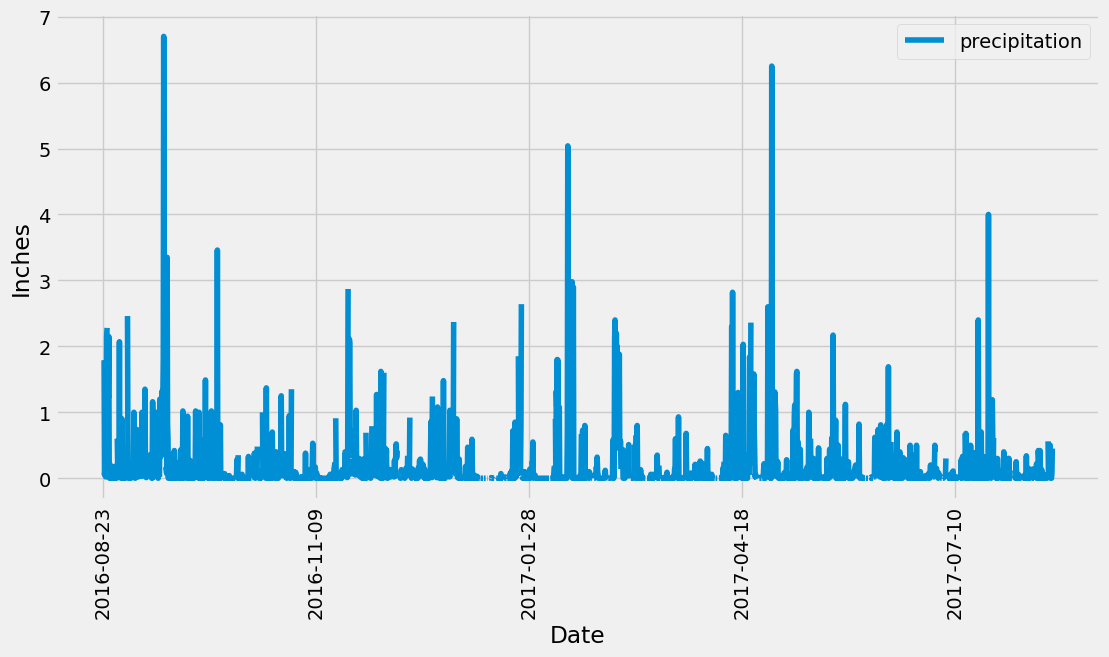

In [275]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='precipitation', rot=90, figsize=(12,6))

plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [255]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [258]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [260]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [262]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(Measurement.tobs), 
              func.min(Measurement.tobs), 
              func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(85.0, 54.0, 71.66378066378067)]

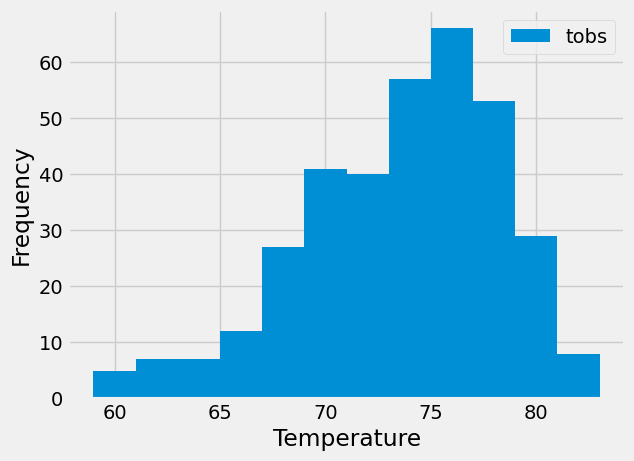

In [264]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

last_year = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
last_year_df = pd.DataFrame(last_year, columns=['tobs'])

# Plot the results as a histogram
last_year_df.plot.hist(bins=12)
plt.xlabel("Temperature")

plt.show()

# Close Session

In [ ]:
# Close Session
session.close()